In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import gmaps
import os
from api_keys import g_key

In [2]:
accident_data = pd.read_csv(r'C:\Users\mseid\Desktop\US_Accidents_Dec19.csv')
accident_data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
2974331,A-2974355,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
loc_data = accident_data[["ID", "Severity", "Start_Lat", "Start_Lng", "State", "Timezone"]]
loc_data

,ID,Severity,Start_Lat,Start_Lng,State,Timezone
0,A-1,3,39.865147,-84.058723,OH,US/Eastern
1,A-2,2,39.928059,-82.831184,OH,US/Eastern
2,A-3,2,39.063148,-84.032608,OH,US/Eastern
3,A-4,3,39.747753,-84.205582,OH,US/Eastern
4,A-5,2,39.627781,-84.188354,OH,US/Eastern
...,...,...,...,...,...,...
2974330,A-2974354,2,34.002480,-117.379360,CA,US/Pacific
2974331,A-2974355,2,32.766960,-117.148060,CA,US/Pacific
2974332,A-2974356,2,33.775450,-117.847790,CA,US/Pacific
2974333,A-2974357,2,33.992460,-118.403020,CA,US/Pacific


In [4]:
loc_data = loc_data.rename(columns = {"Start_Lat": "Latitude", "Start_Lng": "Longitude"})
loc_data

,ID,Severity,Latitude,Longitude,State,Timezone
0,A-1,3,39.865147,-84.058723,OH,US/Eastern
1,A-2,2,39.928059,-82.831184,OH,US/Eastern
2,A-3,2,39.063148,-84.032608,OH,US/Eastern
3,A-4,3,39.747753,-84.205582,OH,US/Eastern
4,A-5,2,39.627781,-84.188354,OH,US/Eastern
...,...,...,...,...,...,...
2974330,A-2974354,2,34.002480,-117.379360,CA,US/Pacific
2974331,A-2974355,2,32.766960,-117.148060,CA,US/Pacific
2974332,A-2974356,2,33.775450,-117.847790,CA,US/Pacific
2974333,A-2974357,2,33.992460,-118.403020,CA,US/Pacific


In [5]:
loc_data.dropna()

,ID,Severity,Latitude,Longitude,State,Timezone
0,A-1,3,39.865147,-84.058723,OH,US/Eastern
1,A-2,2,39.928059,-82.831184,OH,US/Eastern
2,A-3,2,39.063148,-84.032608,OH,US/Eastern
3,A-4,3,39.747753,-84.205582,OH,US/Eastern
4,A-5,2,39.627781,-84.188354,OH,US/Eastern
...,...,...,...,...,...,...
2974330,A-2974354,2,34.002480,-117.379360,CA,US/Pacific
2974331,A-2974355,2,32.766960,-117.148060,CA,US/Pacific
2974332,A-2974356,2,33.775450,-117.847790,CA,US/Pacific
2974333,A-2974357,2,33.992460,-118.403020,CA,US/Pacific


The r-squared is: 0.04713839332604908


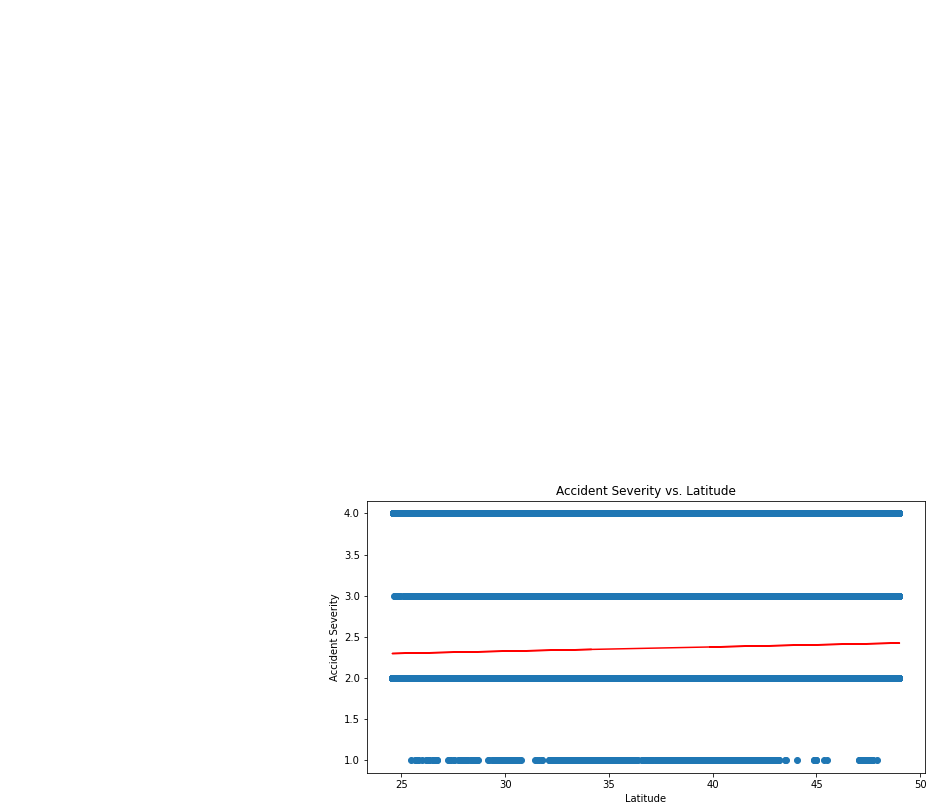

In [13]:
x_values = loc_data["Latitude"]
y_values = loc_data["Severity"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Accident Severity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Accident Severity')
print(f"The r-squared is: {rvalue}")

plt.savefig(r'C:\Users\mseid\UCBWork\team_4_project\output\severity_vs_latitude.png')
plt.show()

In [7]:
loc_group = pd.DataFrame(loc_data.groupby(["State"]).count()).reset_index()
loc_state = loc_group[["State", "ID"]]
loc_state = loc_state.set_index("State")

loc_state.head()

,ID
State,
AL,36369
AR,1749
AZ,62330
CA,663204
CO,40124


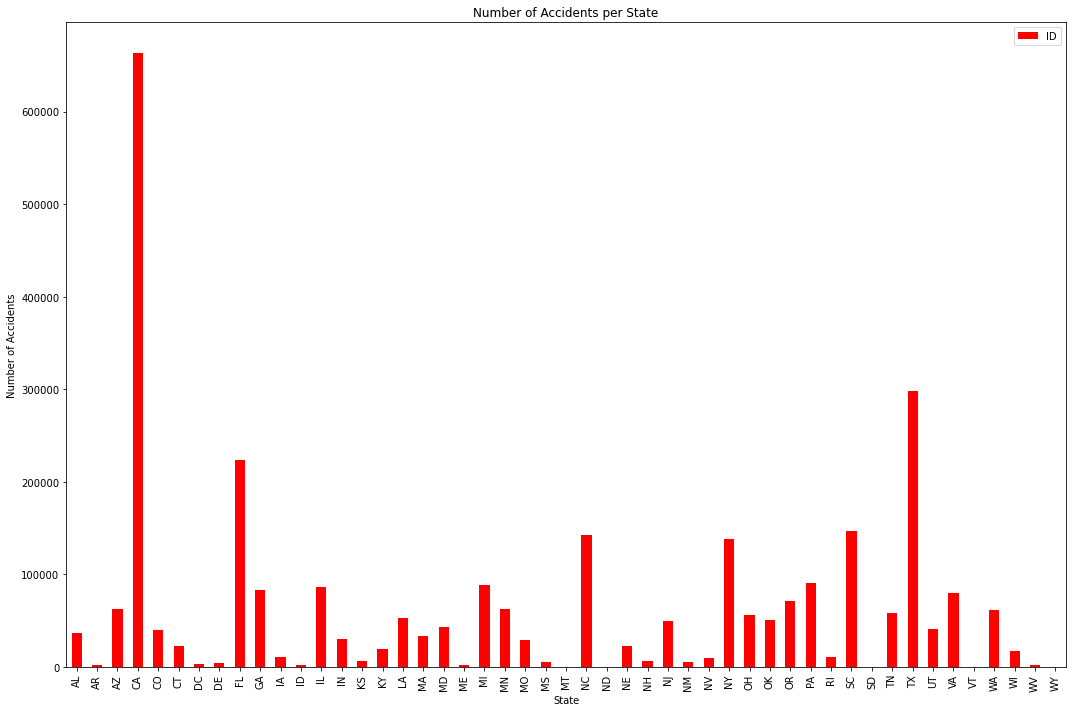

In [8]:
loc_state.plot(kind="bar", color="r", title="Number of Accidents per State", figsize=(15, 10))
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.savefig(r'C:\Users\mseid\UCBWork\team_4_project\output\accidents_per_state.png')
plt.show()

In [9]:
loc_grouped = pd.DataFrame(loc_data.groupby(["Timezone"]).count()).reset_index()
loc_timezone = loc_grouped[["Timezone", "ID"]]
loc_timezone = loc_timezone.set_index("Timezone")

loc_timezone.head()

,ID
Timezone,
US/Central,727147
US/Eastern,1277187
US/Mountain,161721
US/Pacific,805117


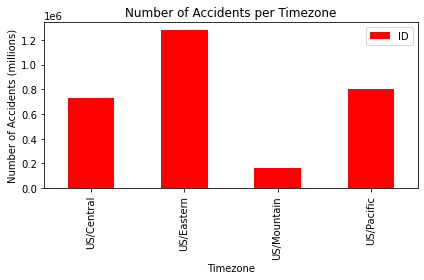

In [10]:
loc_timezone.plot(kind="bar", color="r", title="Number of Accidents per Timezone")
plt.ylabel("Number of Accidents (millions)")

plt.tight_layout()
plt.savefig(r'C:\Users\mseid\UCBWork\team_4_project\output\accidents_per_timezone.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

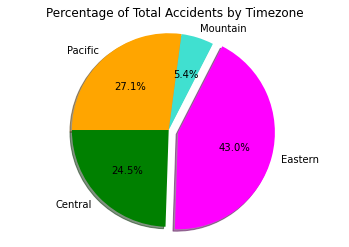

In [11]:
timezones = ["Central", "Eastern", "Mountain", "Pacific"]
explode = [0,0.1,0,0]
colors = ["green", "fuchsia","turquoise","orange"]

plt.pie(loc_timezone, labels=timezones, autopct="%1.1f%%", shadow=True, 
        startangle=180, explode=explode, colors=colors)
plt.title("Percentage of Total Accidents by Timezone")
plt.axis("equal")
plt.savefig(r'C:\Users\mseid\UCBWork\team_4_project\output\accidents_per_timezone_pie.png')
plt.show

In [14]:
gmaps.configure(api_key=g_key)
coords = loc_data[["Latitude", "Longitude"]]
severity = loc_data["Severity"].astype(float)

In [10]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(coords, weights=severity, 
                                 dissipating=False, max_intensity=4,
                                 point_radius=0.2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))